In [88]:
# 리이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [89]:
# 사용할 컬럼들만 추출
cols = [1, 3, 11, 13, 35, 37]

In [90]:
# csv파일에서 데이터프레임 추출
df = pd.read_csv('./subwaytime.csv', usecols=cols, header=0, skiprows=1)
df.columns = ['노선', '하차역', '출근시간1', '출근시간2', '퇴근시간1', '퇴근시간2']

In [91]:
# 데이터프레임 확인
df

,노선,하차역,출근시간1,출근시간2,퇴근시간1,퇴근시간2
0,1호선,서울역,105313,218007,74342,54361
1,1호선,시청,63969,182565,18213,11988
2,1호선,종각,98556,244858,32480,16718
3,1호선,종로3가,23309,61562,22308,12584
4,1호선,종로5가,38726,90539,18273,10528
...,...,...,...,...,...,...
616,신림선,당곡,3345,8281,12365,7842
617,신림선,신림,1313,2640,6274,3812
618,신림선,서원,1166,2085,10227,7068
619,신림선,서울대벤처타운,5236,8763,26890,17184


In [92]:
go_pop_list = []          # 최대 하차인원 리스트
go_station_list = []      # 최대 하차인원의 역 리스트
for i in range(1, 8):     # 1호선부터 7호선끼지
    df_part = df[df['노선'] == f'{i}호선']
    totalSR = df_part['출근시간1'] + df_part['출근시간2']     # 데이터프레임 연산으로 총 하차인원 시리즈 객체 생성
    go_pop_list.append(totalSR.max())
    go_station_list.append(df.iloc[totalSR.idxmax()]['노선'] + ' ' + df.iloc[totalSR.idxmax()]['하차역'])

In [93]:
# 리스트 확인
print(go_pop_list)
print(go_station_list)

[343414, 448033, 308476, 221021, 334282, 129775, 481268]
['1호선 종각', '2호선 역삼', '3호선 양재(서초구청)', '4호선 충무로', '5호선 여의도', '6호선 공덕', '7호선 가산디지털단지']


출근 시간대 1호선 최대 하차역: 종각역, 하차인원: 343,414명
출근 시간대 2호선 최대 하차역: 역삼역, 하차인원: 448,033명
출근 시간대 3호선 최대 하차역: 양재(서초구청)역, 하차인원: 308,476명
출근 시간대 4호선 최대 하차역: 충무로역, 하차인원: 221,021명
출근 시간대 5호선 최대 하차역: 여의도역, 하차인원: 334,282명
출근 시간대 6호선 최대 하차역: 공덕역, 하차인원: 129,775명
출근 시간대 7호선 최대 하차역: 가산디지털단지역, 하차인원: 481,268명



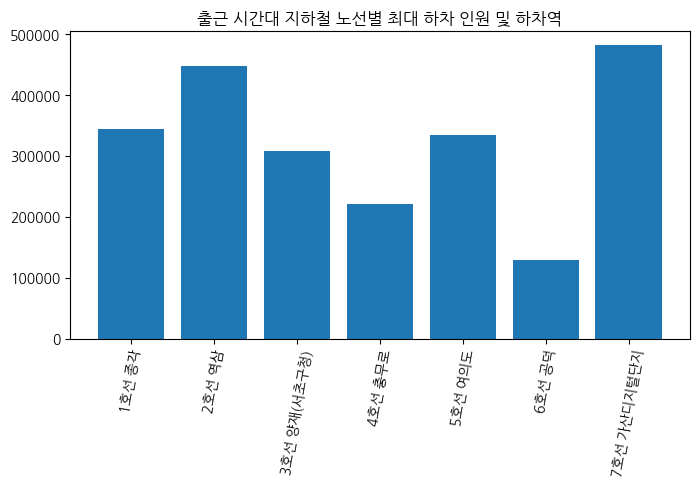

In [94]:
# 결과 출력
for i in range(1, len(go_pop_list)+1):
    print(f'출근 시간대 {i}호선 최대 하차역: {go_station_list[i-1][4:]}역, 하차인원: {go_pop_list[i-1]:,}명')
    
#그래프 출력
print()
plt.figure(figsize=(8, 4))
plt.bar(go_station_list, go_pop_list)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.xticks(rotation=80)
plt.show()

In [95]:
df['노선'].unique()

array(['1호선', '2호선', '3호선', '4호선', '경부선', '경인선', '경원선', '안산선', '과천선',
       '분당선', '일산선', '중앙선', '장항선', '경의선', '경춘선', '수인선', '경강선', '서해선',
       '5호선', '6호선', '7호선', '8호선', '9호선', '공항철도 1호선', '9호선2~3단계', '우이신설선',
       '신림선'], dtype=object)

In [96]:
df['하차역'].value_counts()

서울역               5
김포공항              5
공덕                4
동대문역사문화공원(DDP)    3
고속터미널             3
                 ..
안산                1
초지                1
고잔                1
중앙                1
관악산(서울대)          1
Name: 하차역, Length: 529, dtype: int64

In [97]:
df[df['하차역'] == '서울역']

,노선,하차역,출근시간1,출근시간2,퇴근시간1,퇴근시간2
0,1호선,서울역,105313,218007,74342,54361
111,4호선,서울역,36363,80302,35202,26484
120,경부선,서울역,6483,7296,6218,4526
330,경의선,서울역,23575,35359,2781,1647
570,공항철도 1호선,서울역,20584,30935,21982,14828


In [98]:
df[df['하차역'] == '서울역'].sum()

노선       1호선4호선경부선경의선공항철도 1호선
하차역           서울역서울역서울역서울역서울역
출근시간1                  192318
출근시간2                  371899
퇴근시간1                  140525
퇴근시간2                  101846
dtype: object

In [99]:
back_station_dict = {}          # 최대하차 인원 딕셔너리, 키 : 하차역 / 밸류: 하차인원
for s in df['하차역'].unique(): # 모든 역을 키로 딕셔너리 생성
    back_station_dict[s] = 0

back_station_dict

{'서울역': 0,
 '시청': 0,
 '종각': 0,
 '종로3가': 0,
 '종로5가': 0,
 '동대문': 0,
 '신설동': 0,
 '제기동': 0,
 '청량리(서울시립대입구)': 0,
 '동묘앞': 0,
 '을지로입구': 0,
 '을지로3가': 0,
 '을지로4가': 0,
 '동대문역사문화공원(DDP)': 0,
 '신당': 0,
 '상왕십리': 0,
 '왕십리(성동구청)': 0,
 '한양대': 0,
 '뚝섬': 0,
 '성수': 0,
 '건대입구': 0,
 '구의(광진구청)': 0,
 '강변(동서울터미널)': 0,
 '잠실나루': 0,
 '잠실(송파구청)': 0,
 '잠실새내': 0,
 '종합운동장': 0,
 '삼성(무역센터)': 0,
 '선릉': 0,
 '역삼': 0,
 '강남': 0,
 '교대(법원.검찰청)': 0,
 '서초': 0,
 '방배': 0,
 '사당': 0,
 '낙성대(강감찬)': 0,
 '서울대입구(관악구청)': 0,
 '봉천': 0,
 '신림': 0,
 '신대방': 0,
 '구로디지털단지': 0,
 '대림(구로구청)': 0,
 '신도림': 0,
 '문래': 0,
 '영등포구청': 0,
 '당산': 0,
 '합정': 0,
 '홍대입구': 0,
 '신촌': 0,
 '이대': 0,
 '아현': 0,
 '충정로(경기대입구)': 0,
 '용답': 0,
 '신답': 0,
 '도림천': 0,
 '양천구청': 0,
 '신정네거리': 0,
 '용두(동대문구청)': 0,
 '지축': 0,
 '구파발': 0,
 '연신내': 0,
 '불광': 0,
 '녹번': 0,
 '홍제': 0,
 '무악재': 0,
 '독립문': 0,
 '경복궁(정부서울청사)': 0,
 '안국': 0,
 '충무로': 0,
 '동대입구': 0,
 '약수': 0,
 '금호': 0,
 '옥수': 0,
 '압구정': 0,
 '신사': 0,
 '잠원': 0,
 '고속터미널': 0,
 '남부터미널(예술의전당)': 0,
 '양재(서초구청)': 0,
 '매봉': 0,
 '도곡': 0,
 '대치': 

In [100]:
for i in range(0, df.shape[0]):    # 모든 데이터프레임 인덱스 순회
    oneSR = df.iloc[i]
    back_station_dict[oneSR['하차역']] += (oneSR['퇴근시간1'] + oneSR['퇴근시간2'])    # 하차인원 총원을 합산하여 딕셔너리에 합산

In [101]:
# 딕셔너리 확인
back_station_dict

{'서울역': 242371,
 '시청': 55807,
 '종각': 49198,
 '종로3가': 86419,
 '종로5가': 28801,
 '동대문': 69958,
 '신설동': 48942,
 '제기동': 29928,
 '청량리(서울시립대입구)': 117784,
 '동묘앞': 38097,
 '을지로입구': 89640,
 '을지로3가': 65794,
 '을지로4가': 28901,
 '동대문역사문화공원(DDP)': 115450,
 '신당': 91656,
 '상왕십리': 59533,
 '왕십리(성동구청)': 146565,
 '한양대': 15061,
 '뚝섬': 43406,
 '성수': 73773,
 '건대입구': 217393,
 '구의(광진구청)': 110891,
 '강변(동서울터미널)': 130721,
 '잠실나루': 45777,
 '잠실(송파구청)': 318474,
 '잠실새내': 101539,
 '종합운동장': 48841,
 '삼성(무역센터)': 59098,
 '선릉': 85645,
 '역삼': 62602,
 '강남': 172465,
 '교대(법원.검찰청)': 85804,
 '서초': 30583,
 '방배': 41605,
 '사당': 291686,
 '낙성대(강감찬)': 134581,
 '서울대입구(관악구청)': 217267,
 '봉천': 114602,
 '신림': 311267,
 '신대방': 129957,
 '구로디지털단지': 212287,
 '대림(구로구청)': 115675,
 '신도림': 205289,
 '문래': 63939,
 '영등포구청': 71075,
 '당산': 162746,
 '합정': 173341,
 '홍대입구': 342962,
 '신촌': 129825,
 '이대': 56138,
 '아현': 41565,
 '충정로(경기대입구)': 36266,
 '용답': 12382,
 '신답': 9672,
 '도림천': 4050,
 '양천구청': 37946,
 '신정네거리': 54656,
 '용두(동대문구청)': 8714,
 '지축': 34087,
 '구파발':

In [102]:
# 하차인원을 기준으로 내림차순 정렬
sorted_dict = dict(sorted(back_station_dict.items(), key=(lambda x: x[1]), reverse=True))
sorted_dict

{'홍대입구': 342962,
 '잠실(송파구청)': 318474,
 '신림': 311267,
 '사당': 291686,
 '서울역': 242371,
 '고속터미널': 218649,
 '건대입구': 217393,
 '서울대입구(관악구청)': 217267,
 '구로디지털단지': 212287,
 '신도림': 205289,
 '노원': 197374,
 '수원': 176787,
 '수유(강북구청)': 174152,
 '합정': 173341,
 '강남': 172465,
 '연신내': 166769,
 '당산': 162746,
 '쌍문': 153183,
 '까치산': 150659,
 '왕십리(성동구청)': 146565,
 '부평': 145944,
 '노량진': 145840,
 '부천': 145467,
 '화곡': 141426,
 '천호(풍납토성)': 136474,
 '역곡': 136294,
 '낙성대(강감찬)': 134581,
 '강변(동서울터미널)': 130721,
 '신대방': 129957,
 '신촌': 129825,
 '미아사거리': 122407,
 '수서': 121131,
 '송내': 120471,
 '창동': 119869,
 '청량리(서울시립대입구)': 117784,
 '영등포': 117419,
 '대림(구로구청)': 115675,
 '동대문역사문화공원(DDP)': 115450,
 '금정': 115297,
 '봉천': 114602,
 '범계': 114277,
 '상봉(시외버스터미널)': 111338,
 '구의(광진구청)': 110891,
 '용산': 109799,
 '군자(능동)': 109003,
 '명동': 108296,
 '석계': 107359,
 '개봉': 105505,
 '공덕': 104553,
 '철산': 104374,
 '인덕원': 103225,
 '잠실새내': 101539,
 '성신여대입구(돈암)': 101323,
 '디지털미디어시티': 98738,
 '길음': 98441,
 '회기': 98334,
 '가양': 98200,
 '미사': 96908,
 

홍대입구: 342,962
잠실(송파구청): 318,474
신림: 311,267
사당: 291,686
서울역: 242,371



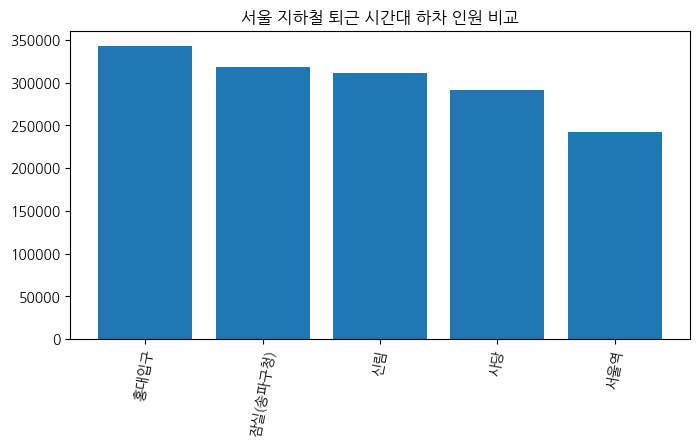

In [103]:
# 결과 출력
cnt = 1
top_keys = []
top_values = []
for k, v in sorted_dict.items():
    if cnt > 5:
        break
    print(f'{k}: {v:,}')
    top_keys.append(k)
    top_values.append(v)
    cnt += 1
    
# 그래프 출력
print()
plt.figure(figsize=(8, 4))
plt.bar(top_keys, top_values)
plt.title('서울 지하철 퇴근 시간대 하차 인원 비교')
plt.xticks(rotation=80)
plt.show()